# Creating and Training the ML Model
This is where the machine learning model is built using different classifiers. The models are compared against one another, then a final model is chosen.

In [1]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix,  classification_report, accuracy_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

## Loading the data

In [2]:
TEST_SIZE = 0.1

dataDict = pickle.load(open('./inputs_and_labels.pickle', 'rb'))
data = np.array(dataDict['data'])
labels = np.array(dataDict['labels']) 
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=TEST_SIZE, shuffle=True, stratify=labels)

In [3]:
print(len(dataDict['data'][0]))

10000


## Initializing the models

In [4]:
import timeit

modelList = []
modelAccuracy = []
modelTrainingTime = []

### Cross Validation Random Forest

In [5]:
# from sklearn.model_selection import cross_val_score
# cf_rfc = RandomForestClassifier(random_state=42)

# scores = cross_val_score(cf_rfc, data, labels, cv=9)
# timeToTrain = timeit.timeit("cf_rfc.fit(X=x_train, y=y_train)", globals=globals(), number=1)
# print(scores)
# modelTrainingTime.append(timeToTrain)
# modelList.append(cf_rfc)

### Random Forest

In [6]:
rfc = RandomForestClassifier()
timeToTrain = timeit.timeit("rfc.fit(X=x_train, y=y_train)", globals=globals(), number=1)
modelTrainingTime.append(timeToTrain)
modelList.append(rfc)


### Support Vector Machines (SVM)

In [7]:
svc = svm.SVC(decision_function_shape='ovr', probability=True)
# svc.fit(x_train, y_train)
timeToTrain = timeit.timeit("svc.fit(X=x_train, y=y_train)", globals=globals(), number=1)
modelTrainingTime.append(timeToTrain)
modelList.append(svc)
# res_svc = svc.predict(x_test)
# print(accuracy_score(y_test, res_svc)*100)

## Testing the Models

In [8]:
# modelNames = ['cf_rfc', 'rfc', 'svc']
modelNames = ['rfc', 'svc']
modelData = {}

for i, modelName in enumerate(modelNames):
  modelData[modelName] = {}
  modelData[modelName]['trained_model'] = modelList[i]
  modelData[modelName]["data"] = modelList[i].predict(x_test)
  modelData[modelName]["training_time"] = modelTrainingTime[i]
  modelData[modelName]['classification_report'] = classification_report(y_true=y_test, y_pred=modelData[modelName]["data"])
  # modelData[modelName]['confusion_matrix'] = ConfusionMatrixDisplay.from_estimator(modelList[i],x_test, y=y_test, labels=np.unique(y_test), normalize='true')
  modelData[modelName]['confusion_matrix'] = confusion_matrix(y_true=y_test,y_pred=modelList[i].predict(x_test), labels=modelList[i].classes_)
  # modelData[modelName]['scores'] = cross_val_score(modelList[i], data, labels, cv=9)
  # modelData[modelName]['diff_pred'] = roc_auc_score(y_true=y_test, y_score=modelList[i].predict_proba(x_test), multi_class='ovr')





## Compare results of models

### By Accuracy


Results for model RFC

Accuracy score: 70%
Time-to-Train: 1.71 seconds
                  precision    recall  f1-score   support

       Chihuahua       0.64      0.56      0.60        16
      Rottweiler       0.79      0.73      0.76        15
golden_retriever       0.67      0.80      0.73        15

        accuracy                           0.70        46
       macro avg       0.70      0.70      0.70        46
    weighted avg       0.70      0.70      0.69        46



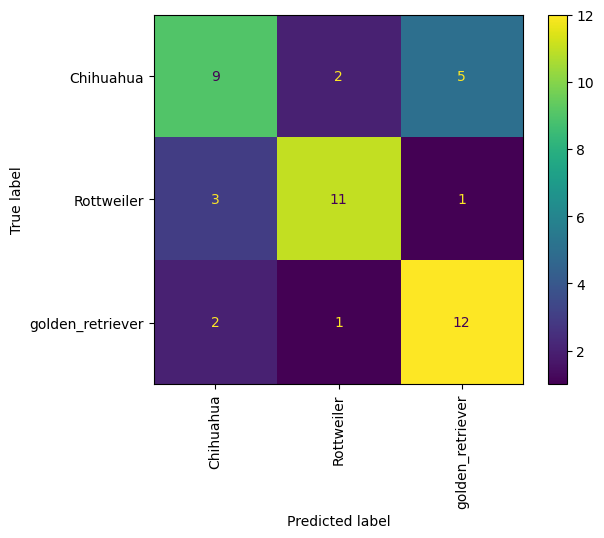


Results for model SVC

Accuracy score: 72%
Time-to-Train: 5.49 seconds
                  precision    recall  f1-score   support

       Chihuahua       0.64      0.56      0.60        16
      Rottweiler       0.80      0.80      0.80        15
golden_retriever       0.71      0.80      0.75        15

        accuracy                           0.72        46
       macro avg       0.72      0.72      0.72        46
    weighted avg       0.71      0.72      0.71        46



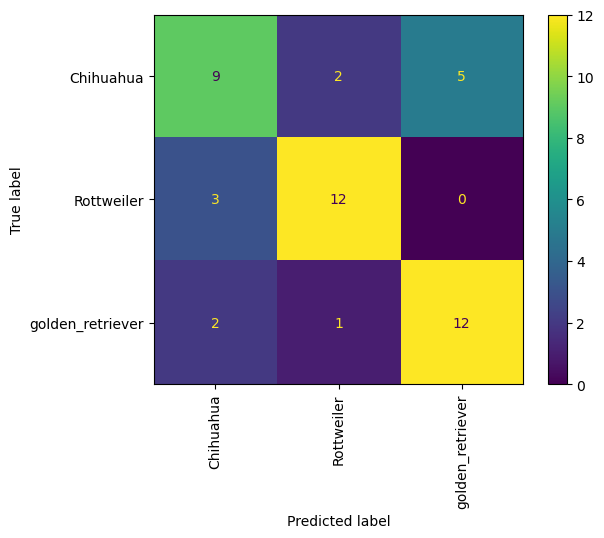

In [9]:
displayLabels = np.unique(y_test)

for name, dataCollection in modelData.items():
  print(f'\nResults for model {str(name).upper()}')
  print("="*40, "\n")
  print(f'Accuracy score: {(accuracy_score(y_true=y_test, y_pred=dataCollection['data']) *100):.0f}%')
  # print(f'Scores: {data['scores']}')
  print(f'Time-to-Train: {dataCollection['training_time']:.2f} seconds')
  # print(f'How far point is from classification plane: {data['diff_pred']}')
  print(dataCollection["classification_report"])
  disp = ConfusionMatrixDisplay(dataCollection['confusion_matrix'])
  # disp.plot()
  # plt.show()
  disp = ConfusionMatrixDisplay(dataCollection['confusion_matrix'], display_labels=dataCollection['trained_model'].classes_)
  disp.plot()
  disp.ax_.set_xticklabels(displayLabels, rotation=90)
  plt.show()

### Class Distribution

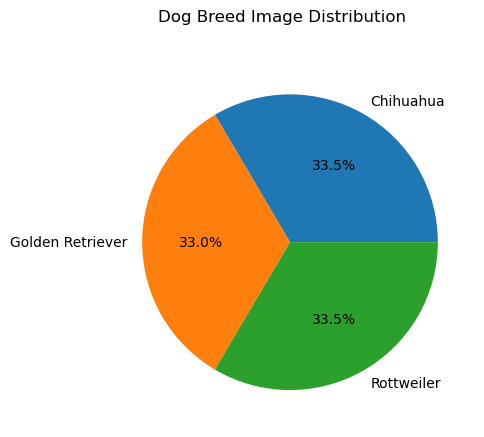

In [10]:
n_points = len(labels)
dataDistribution = {}
for category in labels:
  if category not in dataDistribution:
    dataDistribution[category] = 0
  dataDistribution[category] += 1

names = list(dataDistribution.keys())
for i in range(len(names)):
  t = names[i].split("_")
  newName = ''
  for part in t:
    newName += part.capitalize() + " "
  names[i] = newName.strip(" ")
    
values = list(dataDistribution.values())

# print(names)
fig, ax = plt.subplots()
ax.pie(values, labels=names, autopct='%1.1f%%')
fig.suptitle("Dog Breed Image Distribution")
plt.show()

## Save the best model

In [11]:
import pickle
with open("./trained_models.p", 'wb') as f:
    pickle.dump({
    'rfc': rfc,
    'svc': svc
  }, f)